In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [43]:
tf.__version__

'2.4.1'

In [4]:
data = pd.read_csv('mushrooms.csv')

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.shape

(8124, 23)

In [14]:
# no null data
[x for x in data.columns if data[x].isnull().sum() > 1]

[]

In [15]:
obj_cols = [x for x in data.columns if data[x].dtypes == 'object']

In [17]:
# all object columns
len(obj_cols)

23

In [21]:
# total number of classes
data['class'].unique()

array(['p', 'e'], dtype=object)

In [23]:
# checking number of unique values in each column
for i in data.columns:
    print(i, len(data[i].unique()))

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


# Data Preparation

In [24]:
# converting categorical data to int data by one hot encoding...
train = pd.get_dummies(data, drop_first = True)

In [25]:
train.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
train = train.loc[:, ~train.columns.duplicated()]

In [28]:
train.shape

(8124, 96)

# Correlation matrix

In [29]:
corr_matrix = train.corr()

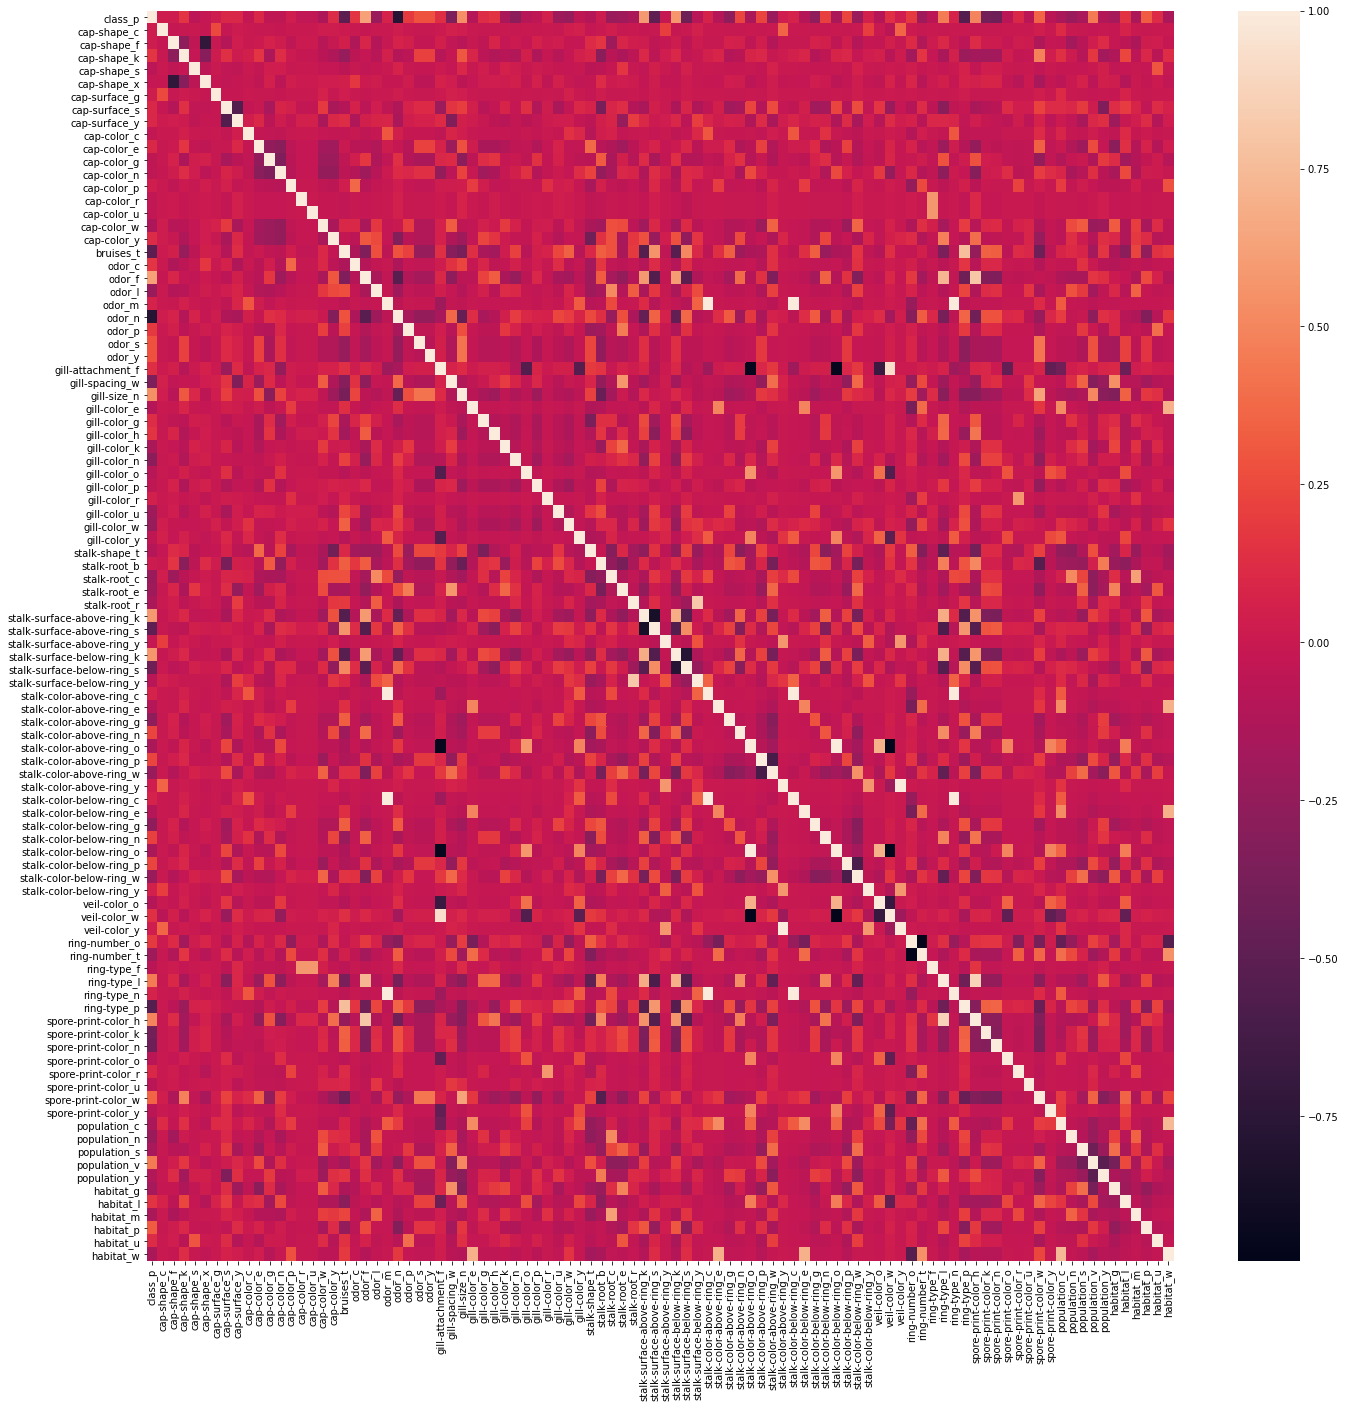

In [30]:
plt.figure(figsize = (23, 23))
sns.heatmap(corr_matrix, annot = False)
plt.show()

# train_test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = train['class_p']
x = train.drop(['class_p'], axis = 1)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [37]:
y_test.shape

(813,)

In [38]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [39]:
x_train.shape

(5848, 95)

In [44]:
x_val.shape

(1463, 95)

# Creating model with keras 

In [45]:
model = Sequential()
model.add(layers.Dense(32, input_shape = [95], activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3072      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [62]:
# adding callback in model if needed at some point to avoid overfitting and saving best model based on max val_accuracy

In [49]:
es = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, mode = 'min')
cp = keras.callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max')

In [52]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_val, y_val), batch_size = 32, callbacks = [es, cp])

Epoch 1/100
183/183 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8831 - val_loss: 0.0210 - val_accuracy: 0.9959
Epoch 2/100
183/183 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9977 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 3/100
183/183 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 9.1445e-04 - val_accuracy: 1.0000
Epoch 5/100
183/183 [==============================] - 0s 1ms/step - loss: 7.0753e-04 - accuracy: 1.0000 - val_loss: 5.0198e-04 - val_accuracy: 1.0000
Epoch 6/100
183/183 [==============================] - 0s 1ms/step - loss: 3.7240e-04 - accuracy: 1.0000 - val_loss: 3.1797e-04 - val_accuracy: 1.0000
Epoch 7/100
183/183 [==============================] - 0s 1ms/step - loss: 2.6534e-04 - accuracy: 1.0000 - val_loss: 2.204

183/183 [==============================] - 0s 2ms/step - loss: 2.5067e-07 - accuracy: 1.0000 - val_loss: 2.4406e-07 - val_accuracy: 1.0000
Epoch 56/100
183/183 [==============================] - 0s 2ms/step - loss: 2.6897e-07 - accuracy: 1.0000 - val_loss: 2.1907e-07 - val_accuracy: 1.0000
Epoch 57/100
183/183 [==============================] - 0s 1ms/step - loss: 1.9273e-07 - accuracy: 1.0000 - val_loss: 1.9781e-07 - val_accuracy: 1.0000
Epoch 58/100
183/183 [==============================] - 0s 2ms/step - loss: 1.6385e-07 - accuracy: 1.0000 - val_loss: 1.7881e-07 - val_accuracy: 1.0000
Epoch 59/100
183/183 [==============================] - 0s 2ms/step - loss: 1.6678e-07 - accuracy: 1.0000 - val_loss: 1.6044e-07 - val_accuracy: 1.0000
Epoch 60/100
183/183 [==============================] - 0s 2ms/step - loss: 1.5547e-07 - accuracy: 1.0000 - val_loss: 1.4609e-07 - val_accuracy: 1.0000
Epoch 61/100
183/183 [==============================] - 0s 2ms/step - loss: 1.0846e-07 - accuracy: 1.

In [61]:
print('the model loss on test data =',model.evaluate(x_test, y_test)[0])
print('the model accuracy on test data =',model.evaluate(x_test, y_test)[1])

26/26 [==============================] - 0s 985us/step - loss: 4.0942e-09 - accuracy: 1.0000
the model loss on test data = 4.094191652370682e-09
26/26 [==============================] - 0s 1ms/step - loss: 4.0942e-09 - accuracy: 1.0000
the model accuracy on test data = 1.0
